# K-Nearest Neighbors Model

by Yesman Choque Mamani (<a href="https://github.com/yesmanic/Machine_Learning_Models">view on github</a>)

This notebook uses scikit-learn to show how KNN algorithm works.

## Initial Setup

The initial setup involves to import some useful libraries to create and manipulate data.

In [62]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

## Classification

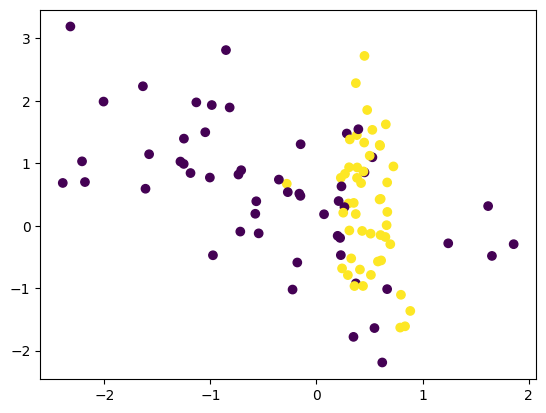

In [42]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_redundant=0, n_informative=2, n_repeated=0,
                           n_clusters_per_class=1, random_state=0,
                           class_sep=0.5, flip_y=0.1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y);

In [46]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [58]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.8

Now we plot the decision boundary of the classification assinging a color to each area

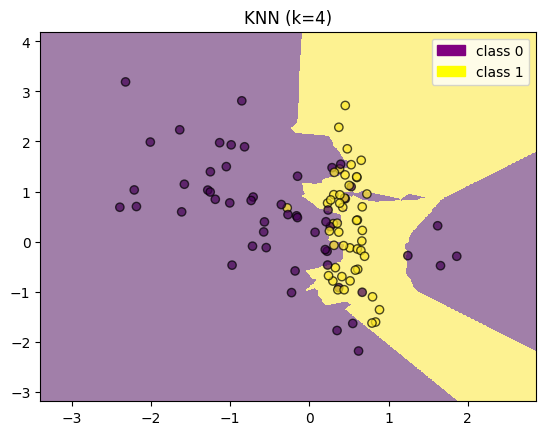

In [65]:
mesh_step_size = 0.01

x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1

feature0_meshgrid, feature1_meshgrid = np.meshgrid(np.arange(x0_min, x0_max, mesh_step_size),
                                                   np.arange(x1_min, x1_max, mesh_step_size))

Z = knn_classifier.predict(np.c_[feature0_meshgrid.ravel(), feature1_meshgrid.ravel()])
Z = Z.reshape(feature0_meshgrid.shape)

plt.figure()
plt.pcolormesh(feature0_meshgrid, feature1_meshgrid, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k', alpha=0.7)
plt.title('KNN (k=4)')

patch0 = mpatches.Patch(color='purple', label='class 0')
patch1 = mpatches.Patch(color='yellow', label='class 1')

plt.legend(handles=[patch0, patch1])
plt.show()
